In [1]:
import pandas as pd
import numpy as np





In [4]:
df = pd.read_csv("Resources\cleaned_wildfire_8.csv")
df


,fire_index,fire_size,fire_cause,latitude,longitude,state,discovery_month,Temp_pre_30,Temp_pre_15,Temp_pre_7,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,year,putout_time
0,3,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,16.275967,18.996181,18.142564,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,2005,0
1,24,40.00,Arson,31.435181,-88.999489,MS,Apr,13.468619,15.067227,15.604790,...,57.997207,56.747191,59.614458,0.000000,0.0,0.0,0.0,0.0,1999,0
2,26,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,3.490698,0.000000,0.000000,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2014,0
3,31,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,-0.891635,0.372659,-4.273834,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,2007,0
4,35,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,20.079480,17.722714,18.188679,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15326,55336,3409.00,Utilities,31.059000,-98.956367,TX,Aug,30.731860,30.545367,28.719917,...,50.089157,49.416505,55.426471,55.233831,0.0,0.0,0.0,0.0,2015,3
15327,55337,4582.00,Utilities,30.075167,-97.149167,TX,Oct,24.642268,23.713390,24.221869,...,62.848172,60.641975,63.196819,57.279040,5.3,0.0,0.0,8.9,2015,11
15328,55341,17823.00,Accidental,44.834600,-117.220600,OR,Sep,15.546194,12.890633,10.734328,...,55.009259,62.368700,67.266304,58.917679,10.4,10.4,9.4,8.6,2015,39
15329,55342,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2.275974,7.360185,7.678571,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,2015,5


In [5]:
df.columns


Index(['fire_index', 'fire_size', 'fire_cause', 'latitude', 'longitude',
       'state', 'discovery_month', 'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7',
       'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont',
       'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30',
       'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'year', 'putout_time'],
      dtype='object')

In [6]:

df.loc[(df["fire_cause"] == "Missing/Undefined") |
       (df["fire_cause"] == "Structure") |
       (df["fire_cause"] == "Miscellaneous"), "fire_cause"] = "Other"

df

,fire_index,fire_size,fire_cause,latitude,longitude,state,discovery_month,Temp_pre_30,Temp_pre_15,Temp_pre_7,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,year,putout_time
0,3,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,16.275967,18.996181,18.142564,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,2005,0
1,24,40.00,Arson,31.435181,-88.999489,MS,Apr,13.468619,15.067227,15.604790,...,57.997207,56.747191,59.614458,0.000000,0.0,0.0,0.0,0.0,1999,0
2,26,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,3.490698,0.000000,0.000000,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2014,0
3,31,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,-0.891635,0.372659,-4.273834,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,2007,0
4,35,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,20.079480,17.722714,18.188679,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15326,55336,3409.00,Utilities,31.059000,-98.956367,TX,Aug,30.731860,30.545367,28.719917,...,50.089157,49.416505,55.426471,55.233831,0.0,0.0,0.0,0.0,2015,3
15327,55337,4582.00,Utilities,30.075167,-97.149167,TX,Oct,24.642268,23.713390,24.221869,...,62.848172,60.641975,63.196819,57.279040,5.3,0.0,0.0,8.9,2015,11
15328,55341,17823.00,Accidental,44.834600,-117.220600,OR,Sep,15.546194,12.890633,10.734328,...,55.009259,62.368700,67.266304,58.917679,10.4,10.4,9.4,8.6,2015,39
15329,55342,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2.275974,7.360185,7.678571,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,2015,5


In [7]:
df.loc[(df["fire_cause"] == "Railroad") |
       (df["fire_cause"] == "Powerline") | 
       (df["fire_cause"] == "Equipment Use"), "fire_cause"] = "Utilities"

df

,fire_index,fire_size,fire_cause,latitude,longitude,state,discovery_month,Temp_pre_30,Temp_pre_15,Temp_pre_7,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,year,putout_time
0,3,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,16.275967,18.996181,18.142564,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,2005,0
1,24,40.00,Arson,31.435181,-88.999489,MS,Apr,13.468619,15.067227,15.604790,...,57.997207,56.747191,59.614458,0.000000,0.0,0.0,0.0,0.0,1999,0
2,26,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,3.490698,0.000000,0.000000,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2014,0
3,31,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,-0.891635,0.372659,-4.273834,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,2007,0
4,35,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,20.079480,17.722714,18.188679,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15326,55336,3409.00,Utilities,31.059000,-98.956367,TX,Aug,30.731860,30.545367,28.719917,...,50.089157,49.416505,55.426471,55.233831,0.0,0.0,0.0,0.0,2015,3
15327,55337,4582.00,Utilities,30.075167,-97.149167,TX,Oct,24.642268,23.713390,24.221869,...,62.848172,60.641975,63.196819,57.279040,5.3,0.0,0.0,8.9,2015,11
15328,55341,17823.00,Accidental,44.834600,-117.220600,OR,Sep,15.546194,12.890633,10.734328,...,55.009259,62.368700,67.266304,58.917679,10.4,10.4,9.4,8.6,2015,39
15329,55342,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2.275974,7.360185,7.678571,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,2015,5


In [8]:
df.loc[(df["fire_cause"] == "Campfire") |
       (df["fire_cause"] == "Children") | 
       (df["fire_cause"] == "Smoking") | 
       (df["fire_cause"] == "Fireworks"), "fire_cause"] = "Accidental"

df

,fire_index,fire_size,fire_cause,latitude,longitude,state,discovery_month,Temp_pre_30,Temp_pre_15,Temp_pre_7,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,year,putout_time
0,3,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,16.275967,18.996181,18.142564,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,2005,0
1,24,40.00,Arson,31.435181,-88.999489,MS,Apr,13.468619,15.067227,15.604790,...,57.997207,56.747191,59.614458,0.000000,0.0,0.0,0.0,0.0,1999,0
2,26,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,3.490698,0.000000,0.000000,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2014,0
3,31,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,-0.891635,0.372659,-4.273834,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,2007,0
4,35,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,20.079480,17.722714,18.188679,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15326,55336,3409.00,Utilities,31.059000,-98.956367,TX,Aug,30.731860,30.545367,28.719917,...,50.089157,49.416505,55.426471,55.233831,0.0,0.0,0.0,0.0,2015,3
15327,55337,4582.00,Utilities,30.075167,-97.149167,TX,Oct,24.642268,23.713390,24.221869,...,62.848172,60.641975,63.196819,57.279040,5.3,0.0,0.0,8.9,2015,11
15328,55341,17823.00,Accidental,44.834600,-117.220600,OR,Sep,15.546194,12.890633,10.734328,...,55.009259,62.368700,67.266304,58.917679,10.4,10.4,9.4,8.6,2015,39
15329,55342,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2.275974,7.360185,7.678571,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,2015,5


In [10]:
df.fire_cause.value_counts()


Lightning         4915
Debris Burning    4045
Arson             3396
Accidental        1488
Utilities         1487
Name: fire_cause, dtype: int64

In [11]:
df.columns

Index(['fire_index', 'fire_size', 'fire_cause', 'latitude', 'longitude',
       'state', 'discovery_month', 'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7',
       'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont',
       'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30',
       'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'year', 'putout_time'],
      dtype='object')

In [12]:
df

,fire_index,fire_size,fire_cause,latitude,longitude,state,discovery_month,Temp_pre_30,Temp_pre_15,Temp_pre_7,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,year,putout_time
0,3,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,16.275967,18.996181,18.142564,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,2005,0
1,24,40.00,Arson,31.435181,-88.999489,MS,Apr,13.468619,15.067227,15.604790,...,57.997207,56.747191,59.614458,0.000000,0.0,0.0,0.0,0.0,1999,0
2,26,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,3.490698,0.000000,0.000000,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2014,0
3,31,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,-0.891635,0.372659,-4.273834,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,2007,0
4,35,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,20.079480,17.722714,18.188679,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15326,55336,3409.00,Utilities,31.059000,-98.956367,TX,Aug,30.731860,30.545367,28.719917,...,50.089157,49.416505,55.426471,55.233831,0.0,0.0,0.0,0.0,2015,3
15327,55337,4582.00,Utilities,30.075167,-97.149167,TX,Oct,24.642268,23.713390,24.221869,...,62.848172,60.641975,63.196819,57.279040,5.3,0.0,0.0,8.9,2015,11
15328,55341,17823.00,Accidental,44.834600,-117.220600,OR,Sep,15.546194,12.890633,10.734328,...,55.009259,62.368700,67.266304,58.917679,10.4,10.4,9.4,8.6,2015,39
15329,55342,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2.275974,7.360185,7.678571,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,2015,5


In [13]:
df=df.loc[df["fire_cause"]!="Other"]
df

,fire_index,fire_size,fire_cause,latitude,longitude,state,discovery_month,Temp_pre_30,Temp_pre_15,Temp_pre_7,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,year,putout_time
0,3,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,16.275967,18.996181,18.142564,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,2005,0
1,24,40.00,Arson,31.435181,-88.999489,MS,Apr,13.468619,15.067227,15.604790,...,57.997207,56.747191,59.614458,0.000000,0.0,0.0,0.0,0.0,1999,0
2,26,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,3.490698,0.000000,0.000000,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2014,0
3,31,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,-0.891635,0.372659,-4.273834,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,2007,0
4,35,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,20.079480,17.722714,18.188679,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15326,55336,3409.00,Utilities,31.059000,-98.956367,TX,Aug,30.731860,30.545367,28.719917,...,50.089157,49.416505,55.426471,55.233831,0.0,0.0,0.0,0.0,2015,3
15327,55337,4582.00,Utilities,30.075167,-97.149167,TX,Oct,24.642268,23.713390,24.221869,...,62.848172,60.641975,63.196819,57.279040,5.3,0.0,0.0,8.9,2015,11
15328,55341,17823.00,Accidental,44.834600,-117.220600,OR,Sep,15.546194,12.890633,10.734328,...,55.009259,62.368700,67.266304,58.917679,10.4,10.4,9.4,8.6,2015,39
15329,55342,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2.275974,7.360185,7.678571,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,2015,5


In [29]:
#df.to_csv("Resources/cleaned_wildfire_7.csv")

In [15]:


df30 = df[[ 'fire_index', 'fire_size', 'fire_cause', 'latitude',
                 'longitude', 'discovery_month', 'putout_time',
                 'Temp_pre_30', 'Wind_pre_30',
                'Hum_pre_30', 'Prec_pre_30',
                  'year']]
df30.to_csv("Resources/df30.csv")


In [16]:
df15 = df[[ 'fire_index', 'fire_size', 'fire_cause', 'latitude',
                 'longitude', 'discovery_month', 'putout_time',
                 'Temp_pre_15', 'Wind_pre_15',
                'Hum_pre_15', 'Prec_pre_15',
                  'year']]
df15.to_csv("Resources/df15.csv")


In [17]:
df7 = df[[ 'fire_index', 'fire_size', 'fire_cause', 'latitude',
                 'longitude', 'discovery_month', 'putout_time',
                 'Temp_pre_7', 'Wind_pre_7',
                'Hum_pre_7', 'Prec_pre_7',
                  'year']]
df7.to_csv("Resources/df7.csv")


In [18]:

dfcont = df[[ 'fire_index', 'fire_size', 'fire_cause', 'latitude',
                 'longitude', 'discovery_month', 'putout_time',
                 'Temp_cont', 'Wind_cont',
                'Hum_cont', 'Prec_cont',
                  'year']]
dfcont.to_csv("Resources/dfcont.csv")


In [19]:
fire_info_df = df[['fire_index', 'fire_size', 'fire_cause', 'latitude', 'longitude', 'state', 'discovery_month', 'putout_time','year']]
fire_info_df.to_csv("Resources/fire_info_df.csv")



<AxesSubplot:>

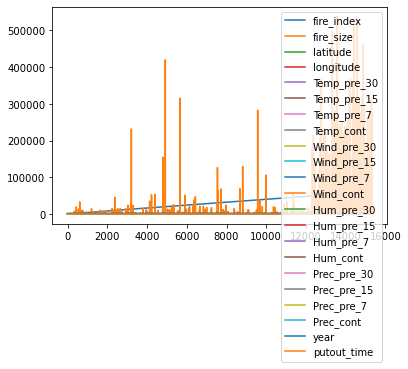

In [20]:
df.plot()

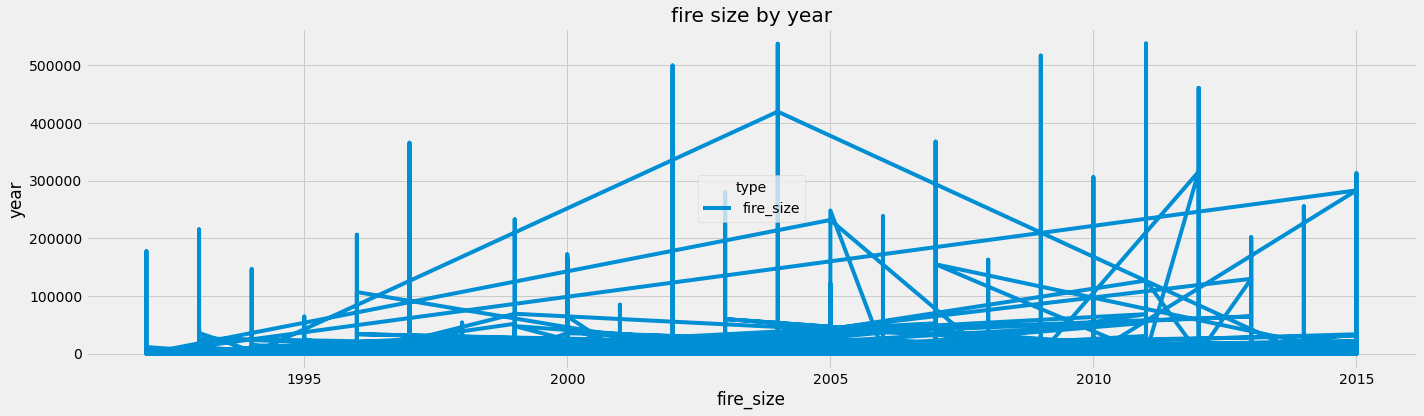

In [21]:
import matplotlib.pyplot as plt
# Import the style from Matplotlib.
from matplotlib import style
%matplotlib inline

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig,ax = plt.subplots()
df.plot(x='year', y='fire_size', figsize = (20,6), ax=ax)
ax.set_title("fire size by year")
ax.set_xlabel("fire_size")
ax.set_ylabel("year")
ax.legend(title = "type", loc = "center")
plt.tight_layout()
#the chart is saved to analysis folder
#plt.savefig("analysis/PyBer_fare_summary.png")

#show chart

plt.show()

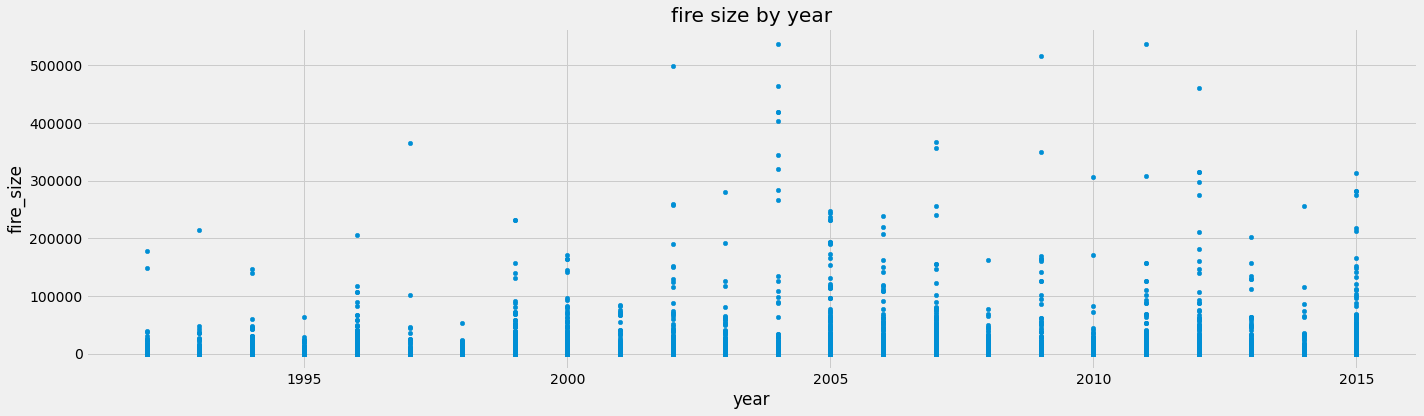

In [22]:
import matplotlib.pyplot as plt
# Import the style from Matplotlib.
from matplotlib import style
%matplotlib inline


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig,ax = plt.subplots()
df.plot(x='year', y='fire_size', kind='scatter', figsize = (20,6), ax=ax)
ax.set_title("fire size by year")
ax.set_xlabel("year")
ax.set_ylabel("fire_size")
#ax.legend(title = "type", loc = "center")
plt.tight_layout()
#the chart is saved to analysis folder
#plt.savefig("analysis/PyBer_fare_summary.png")

#show chart

plt.show()